In [3]:
import os
import time
import math
import random
import datetime
from pathlib import Path
# !pip install transformers
# os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"  # reduce the amount of console output from TF
import tensorflow as tf
from transformers import *
!pip install -q datasets # install HF datasets library
from datasets import load_dataset
import torch

import logging
# logging.set_verbosity_warning()
# logging.set_verbosity_error()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 16.7 MB/s eta 0:00:00


In [4]:
print('TF version',tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU'))) # check GPU available

TF version 2.12.0
Num GPUs Available:  1


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [7]:
dataset_full = load_dataset("mbpp")

Generating train split:   0%|          | 0/374 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/90 [00:00<?, ? examples/s]

Generating prompt split:   0%|          | 0/10 [00:00<?, ? examples/s]

Dataset mbpp downloaded and prepared to /root/.cache/huggingface/datasets/mbpp/full/1.0.2/4458a31cd4305553c8e88e3f0bfb94fc74fe1a9faeeb8c32ed166939735eaeff. Subsequent calls will reuse this data.


  0%|          | 0/4 [00:00<?, ?it/s]

In [8]:
test_set = dataset_full['test']

# Model codeGen

Paper: https://arxiv.org/pdf/2303.16749.pdf

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codegen-6B-mono")

loading file vocab.json from cache at /home/jupyter/.cache/huggingface/hub/models--Salesforce--codegen-6B-mono/snapshots/86e5d4ccee4e2d505c4bf2bb33c456a64be00a7d/vocab.json
loading file merges.txt from cache at /home/jupyter/.cache/huggingface/hub/models--Salesforce--codegen-6B-mono/snapshots/86e5d4ccee4e2d505c4bf2bb33c456a64be00a7d/merges.txt
loading file tokenizer.json from cache at /home/jupyter/.cache/huggingface/hub/models--Salesforce--codegen-6B-mono/snapshots/86e5d4ccee4e2d505c4bf2bb33c456a64be00a7d/tokenizer.json
loading file added_tokens.json from cache at /home/jupyter/.cache/huggingface/hub/models--Salesforce--codegen-6B-mono/snapshots/86e5d4ccee4e2d505c4bf2bb33c456a64be00a7d/added_tokens.json
loading file special_tokens_map.json from cache at /home/jupyter/.cache/huggingface/hub/models--Salesforce--codegen-6B-mono/snapshots/86e5d4ccee4e2d505c4bf2bb33c456a64be00a7d/special_tokens_map.json
loading file tokenizer_config.json from cache at /home/jupyter/.cache/huggingface/hub/m

In [ ]:
model = AutoModelForCausalLM.from_pretrained("Salesforce/codegen-6B-mono").to(device);

loading configuration file config.json from cache at /home/jupyter/.cache/huggingface/hub/models--Salesforce--codegen-6B-mono/snapshots/86e5d4ccee4e2d505c4bf2bb33c456a64be00a7d/config.json
Model config CodeGenConfig {
  "_name_or_path": "Salesforce/codegen-6B-mono",
  "activation_function": "gelu_new",
  "architectures": [
    "CodeGenForCausalLM"
  ],
  "attn_pdrop": 0.0,
  "bos_token_id": 1,
  "embd_pdrop": 0.0,
  "eos_token_id": 50256,
  "gradient_checkpointing": false,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "codegen",
  "n_ctx": 2048,
  "n_embd": 4096,
  "n_head": 16,
  "n_inner": null,
  "n_layer": 33,
  "n_positions": 2048,
  "resid_pdrop": 0.0,
  "rotary_dim": 64,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 

loading weights file pytorch_model.bin from cache at /home/jupyter/.cache/huggingface/hub/models--Salesforce--codegen-6B-mono/snapshots/86e5d4ccee4e2d505c4bf2bb33c456a64be00a7d/pytorch_model.bin
Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 1,
  "eos_token_id": 50256,
  "transformers_version": "4.28.1"
}



RuntimeError: [enforce fail at alloc_cpu.cpp:75] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 268435456 bytes. Error code 12 (Cannot allocate memory)

- Example 1: One-shot

In [ ]:
text = '''Write a python function to remove first and last occurrence of a given character from the string.\n>>> Example: remove_Occ("hello","l") == "heo"'''

In [ ]:
print(text)

Write a python function to remove first and last occurrence of a given character from the string.
>>> Example: remove_Occ("hello","l") == "heo"


In [ ]:
text_input = text
inputs = tokenizer(text_input, return_tensors="pt")
sample = model.generate(**inputs, max_length=128)

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 1,
  "eos_token_id": 50256,
  "transformers_version": "4.28.1"
}

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
output = tokenizer.decode(sample[0], skip_special_tokens=True)

In [ ]:
print(output)

Write a python function to remove first and last occurrence of a given character from the string.
>>> Example: remove_Occ("hello","l") == "heo"

"""

def remove_Occ(str, ch):
    return str.replace(ch, "")

print(remove_Occ("hello", "l"))
print(remove_Occ("hello", "o"))
print(remove_Occ("hello", "h"))
print(remove_Occ("hello", "e"))
print(remove_Occ("hello", "l"))
print(remove_Occ("


- Example Few-Shot

In [ ]:
text = '''Write a python function to remove first and last occurrence of a given character from the string.\n>>> Example: remove_Occ("hello","l") == "heo"\nremove_Occ("abcda","a") == "bcd"\nremove_Occ("PHP","P") == "H"'''

In [ ]:
print(text)

Write a python function to remove first and last occurrence of a given character from the string.
>>> Example: remove_Occ("hello","l") == "heo"
remove_Occ("abcda","a") == "bcd"
remove_Occ("PHP","P") == "H"


In [ ]:
text_input = text
inputs = tokenizer(text_input, return_tensors="pt")
sample = model.generate(**inputs, max_length=128)

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 1,
  "eos_token_id": 50256,
  "transformers_version": "4.28.1"
}

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
output = tokenizer.decode(sample[0], skip_special_tokens=True)

In [ ]:
print(output)

Write a python function to remove first and last occurrence of a given character from the string.
>>> Example: remove_Occ("hello","l") == "heo"
remove_Occ("abcda","a") == "bcd"
remove_Occ("PHP","P") == "H"
remove_Occ("abcda","z") == "abcda"
remove_Occ("abcda","z") == "abcda"
remove_Occ("abcda","z") == "abcda"
remove_Occ("abcda","z") == "abcda"
remove_Occ


In [ ]:
print(output)

Write a python function to remove first and last occurrence of a given character from the string.
>>> Example: remove_Occ("hello","l") == "heo"
remove_Occ("abcda","a") == "bcd"
remove_Occ("PHP","P") == "H"
remove_Occ("abcda","z") == "abcda"
remove_Occ("abcda","z") == "abcda"
remove_Occ("abcda","z") == "abcda"
remove_Occ("abcda","z") == "abcda"
remove_Occ


- Example Zero-Shot

In [ ]:
text = '''Write a python function to remove first and last occurrence of a given character from the string.'''

In [ ]:
text_input = text
inputs = tokenizer(text_input, return_tensors="pt")
sample = model.generate(**inputs, max_length=128)

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 1,
  "eos_token_id": 50256,
  "transformers_version": "4.28.1"
}

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [ ]:
output = tokenizer.decode(sample[0], skip_special_tokens=True)

# Prediction

In [9]:
import csv
import pandas as pd
import os

In [10]:
def make_prediction(model, input_ids: list, max_length=128, batch=False,**kwargs):
    outputs = model.generate(input_ids, max_length=max_length, **kwargs)
    if batch:
        outputs = tokenizer.batch_decode(outputs, skip_special_tokens=True)
    else:
        outputs = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return outputs

In [11]:
def save_output(output_file: str, data: list, header):
  # Create file if it doesn't exist
  if not os.path.exists(output_file):
    with open(output_file, "a+", encoding='utf-8') as f:
        write = csv.writer(f)
        write.writerows([header])
  results_df = pd.DataFrame.from_records(data, columns=header)
  results_df.to_csv(output_file, mode='a', index=False, header=None)

- Single Prediction: 3 Tests

In [12]:
def format_input(text: str, test_list: list) -> str:
    '''Example:
    Inputs:
    - text: 'Write a python function to remove first and last occurrence of a given character from the string.'
    - test_list: ['assert remove_Occ("hello","l") == "heo"', 'assert remove_Occ("abcda","a") == "bcd"', 'assert remove_Occ("PHP","P") == "H"']
    Output:
        Write a python function to remove first and last occurrence of a given character from the string.
        >>> Example: remove_Occ("hello","l") == "heo"
        >>> Example: remove_Occ("abcda","a") == "bcd"
        >>> Example: remove_Occ("PHP","P") == "H"
    '''
    test_list_processed = ['\n>>> Example: ' + test.split('assert ')[1] for test in test_list]
    text_input = text + ''.join(test_list_processed)
    return text_input

In [ ]:
# MAX_LENGTH = 1331
results = []
# list_of_inputs = []
# list_of_true_labels = []
# list_of_predictions = []
full_path = 'outputs'
model_name = 'codegen-6B-mono'
output_file = f"{full_path}/{model_name}-pred.csv"
for sample in test_set:
    task_id = sample['task_id']
    example = sample['text']
    true_label = sample['code']
    max_length = len(true_label)
    inputs = format_input(example, sample['test_list'])
    model_inputs = tokenizer(inputs, return_tensors="pt") # prediction with same lengh as output
    output = make_prediction(model, model_inputs.input_ids, max_length=max_length)
      # list_of_inputs.append([inputs]) 
      # list_of_predictions.append([output])
      # list_of_true_labels.append([true_label])
    result = [{'task_id': task_id, 'text': example, 'test_list': sample['test_list'],
                 'input': inputs, 'true_label': true_label, 'prediction': output}]
    results.append(result)
    save_output(output_file, result, header=['task_id', 'text', 'test_list',
             'input', 'true_label', 'prediction'])
  # break

- Single Prediction: 1 Example

In [ ]:
# test_set[0]

In [ ]:
# MAX_LENGTH = 1331
results = []
# list_of_inputs = []
# list_of_true_labels = []
# list_of_predictions = []
full_path = 'outputs'
model_name = 'codegen-6B-mono'
output_file = f"{full_path}/{model_name}-pred-1example.csv"
for sample in test_set:
    # print(sample)
    # print(sample)
    task_id = sample['task_id']
    if task_id <= 15:
        continue
    example = sample['text']
    true_label = sample['code']
    max_length = len(true_label)
    inputs = format_input(example, [sample['test_list'][0]]) # passing only one example
    model_inputs = tokenizer(inputs, return_tensors="pt") # prediction with same lengh as output
    output = make_prediction(model, model_inputs.input_ids, max_length=max_length)
      # list_of_inputs.append([inputs]) 
      # list_of_predictions.append([output])
      # list_of_true_labels.append([true_label])
    result = [{'task_id': task_id, 'text': example, 'test_list': sample['test_list'],
                 'input': inputs, 'true_label': true_label, 'prediction': output}]
    results.append(result)
    save_output(output_file, result, header=['task_id', 'text', 'test_list',
             'input', 'true_label', 'prediction'])
  # break

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 1,
  "eos_token_id": 50256,
  "transformers_version": "4.28.1"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 1,
  "eos_token_id": 50256,
  "transformers_version": "4.28.1"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 1,
  "eos_token_id": 50256,
  "transformers_version": "4.28.1"
}

The attention mask and the pad token id were not se

KeyboardInterrupt: 

- Multiple Predictions (num_return_sequences)

In [13]:
print('Model on GPU?: ', next(model.parameters()).is_cuda)

NameError: ignored

In [ ]:
# MAX_LENGTH = 1331
results = []
# list_of_inputs = []
# list_of_true_labels = []
# list_of_predictions = []
full_path = 'outputs'
model_name = 'codegen-6B-mono-multiple-outputs'
output_file = f"{full_path}/{model_name}-pred.csv"
for sample in test_set:
    task_id = sample['task_id']
    example = sample['text']
    true_label = sample['code']
    max_length = len(true_label)
    inputs = format_input(example, [sample['test_list'][0]]) # passing only one example
    model_inputs = tokenizer(inputs, return_tensors="pt").to(device) # prediction with same lengh as output
    output = make_prediction(model, model_inputs.input_ids, max_length=max_length, batch=True,
                           num_beams=80, num_return_sequences=80, early_stopping=True)
    del model_inputs
  # list_of_inputs.append([inputs]) 
  # list_of_predictions.append([output])
  # list_of_true_labels.append([true_label])
    result = [{'task_id': task_id, 'text': example, 'test_list': sample['test_list'],
             'input': inputs, 'true_label': true_label, 'prediction': output}]
    # results.append(result)
    save_output(output_file, result, header=['task_id', 'text', 'test_list',
             'input', 'true_label', 'prediction'])

Generate config GenerationConfig {
  "_from_model_config": true,
  "bos_token_id": 1,
  "eos_token_id": 50256,
  "transformers_version": "4.28.1"
}

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


RuntimeError: [enforce fail at alloc_cpu.cpp:75] err == 0. DefaultCPUAllocator: can't allocate memory: you tried to allocate 28672000 bytes. Error code 12 (Cannot allocate memory)

# Evaluation

In [14]:
# import nltk
# from nltk.tokenize import word_tokenize
# from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import numpy as np
import pandas as pd
import logging

logger = logging.getLogger('Evaluation')

logger.setLevel(logging.DEBUG)# allow DEBUG level messages to pass through the logger

- Synthesis Performance

In [37]:
df = pd.read_csv('/content/drive/MyDrive/CSCI544/Project/codegen-2B-mono-pred-1example-manually-eval.csv')

In [38]:
df = df.drop_duplicates(subset='task_id').head(100)

In [39]:
rows = df[['task_id', 'test_list','true_label', 'prediction']].values

In [53]:
acc_list = []
error_messages = []
result = []
logger.info('Starting loop')

for i, row in enumerate(rows):
    task_id, test_list, true_label, prediction = row
    logger.info(f'Processing item {i+1} of {len(rows)}. Task_id: {task_id}')
    test_list = eval(test_list) # evaluate the string representation of each list as a Python expression
    # Get code after 'def'
    try:
      def_index = prediction.find('def')  # find the index of the 'def' keyword
      function_def = prediction[def_index:]  # extract the substring starting from 'def'
    except:
      function_def = ''
      prediction = ''

    error_list = []
    count_success = 0
    try:
      # if task_id != 45:   
      exec(function_def)
      for i, test in enumerate(test_list):
        try:
          exec(test)
          error_list.append(f'Test {i} Success')
          count_success += 1
        except Exception as e:
          # print(type(e))
          if not len(function_def):
            error_list.append(f'Test {i} No Result')
          else:
            error_list.append(f'Test {i} {type(e)}: {e}')
      # else:
      #   error_list.append(f"Test {i}: <class \'RecursionError\'>: maximum recursion depth exceeded in comparison")

    except Exception as e:
        error_list.append(f'{type(e)}: {e}')
    acc_list.append(count_success/len(test_list))
    error_messages.append(error_list)
    result.append(
      {'task_id': task_id, 'test_list': test_list, 'true_label': true_label,
       'prediction': prediction, 'prediction_cleaned': function_def, 'successful_test_cases': count_success,
       'error_list': error_list})

INFO:Evaluation:Starting loop
INFO:Evaluation:Processing item 1 of 100. Task_id: 11
INFO:Evaluation:Processing item 2 of 100. Task_id: 12
INFO:Evaluation:Processing item 3 of 100. Task_id: 13
INFO:Evaluation:Processing item 4 of 100. Task_id: 14
INFO:Evaluation:Processing item 5 of 100. Task_id: 15
INFO:Evaluation:Processing item 6 of 100. Task_id: 16
INFO:Evaluation:Processing item 7 of 100. Task_id: 17
INFO:Evaluation:Processing item 8 of 100. Task_id: 18
INFO:Evaluation:Processing item 9 of 100. Task_id: 19
INFO:Evaluation:Processing item 10 of 100. Task_id: 20
INFO:Evaluation:Processing item 11 of 100. Task_id: 21
INFO:Evaluation:Processing item 12 of 100. Task_id: 22
INFO:Evaluation:Processing item 13 of 100. Task_id: 23
INFO:Evaluation:Processing item 14 of 100. Task_id: 24
INFO:Evaluation:Processing item 15 of 100. Task_id: 25
INFO:Evaluation:Processing item 16 of 100. Task_id: 26
INFO:Evaluation:Processing item 17 of 100. Task_id: 27
INFO:Evaluation:Processing item 18 of 100. T

In [58]:
output_file = "/content/drive/MyDrive/CSCI544/Project/codegen-2B-mono-eval.csv"
save_output(output_file, result, header=['task_id', 'test_list', 'true_label',
       'prediction', 'prediction_cleaned', 'successful_test_cases',
       'error_list'])

### Pass @k

The pass@k is the fraction of prompts for which the model succeeded in this sense.

For example, if Pass@5 is 80%, it means that for 80% of the queries, the system returned at least one relevant document among the top 5 results.

It robustly estimates the probability that one of k generations passes the tests

Reference: https://twitter.com/lvwerra/status/1474072790785564673

In [60]:
!pip install evaluate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 3.2 MB/s eta 0:00:00


In [73]:
from evaluate import load
import pandas as pd
import os
os.environ["HF_ALLOW_CODE_EVAL"] = "1"

In [74]:
def compute_pass_k_metric(test_cases: list, candidates: list, k: list) -> tuple:
  '''The Code Eval metric calculates how good are predictions given a set of references
  https://huggingface.co/spaces/evaluate-metric/code_eval

  Args:
    test_cases
    candidates
    k
  Returns:
    (dict, dict)
  '''
  # Join test cases into a single string.
  test_cases_joined = ['\n'.join(test) for test in test_cases]
  pass_at_k, results = code_eval.compute(references=test_cases_joined, predictions=candidates, k=k)
  return pass_at_k, results

In [76]:
df = pd.read_csv('/content/drive/MyDrive/CSCI544/Project/codegen-2B-mono-multiple-outputs-pred.csv')

In [77]:
len(eval(df['prediction'].iloc[0]))

5

In [78]:
df = df.drop_duplicates(subset=['task_id'])

In [79]:
df = df.head(100)

In [80]:
code_eval = load("code_eval")

In [81]:
def post_processing(prediction: list) -> list:
  '''Get string after 'def' statement
  '''
  output = []
  for pred in prediction:
      def_index = pred.find('def') # get only function
      output.append(pred[def_index:])
  return output

In [82]:
# Clean output
df['prediction_cleaned'] = df['prediction'].apply(lambda x: post_processing(eval(x)))

In [83]:
pass_k_test = []
pass_k_predictions = []
for test, pred in zip(df['test_list'], df['prediction_cleaned']):
    pass_k_test.append(eval(test))
    pass_k_predictions.append(pred)

In [84]:
%%time
pass_at_k, results = compute_pass_k_metric(pass_k_test, pass_k_predictions, [1,2,5])

CPU times: user 2.65 s, sys: 29.8 s, total: 32.5 s
Wall time: 49.8 s


In [85]:
pass_at_k

{'pass@1': 0.08199999999999999, 'pass@2': 0.09200000000000001, 'pass@5': 0.1}

In [ ]:
pass_at_k

{'pass@1': 0.08679245283018867,
 'pass@2': 0.09622641509433962,
 'pass@5': 0.10377358490566038}

In [ ]:
import json

# as requested in comment
results = {'results': results}

with open('outputs/code_gen_pass_k_metric_results.txt', 'w') as file:
     file.write(json.dumps(results))

### What sort of errors the model makes?

According to "CodeRL: Mastering Code Generation through Pretrained Models and Deep Reinforcement Learning" paper, we can classify the error in 5 different categories:
- "Compile Error"
- "Runtime Error"
- "Failed Test"
- "Passed Test"
- "No Results"

In [63]:
from collections import Counter

In [65]:
df_eval = pd.read_csv('/content/drive/MyDrive/CSCI544/Project/codegen-2B-mono-eval.csv')

In [67]:
def retrieve_error_message(error_string: str) -> str or None:
    '''Retrieve error type form string, 
     return None if not found
     '''
    try:
        start_index = error_string.index("<class '") + len("<class '")
        end_index = error_string.index("'>:")
        assertion_error_str = error_string[start_index:end_index]
    except:
        # if no error is found, search for success
        if 'Success' in error_string:
            assertion_error_str = 'Success'
        if 'No Result' in error_string:
          assertion_error_str = 'No Result'
        # Should never happen
        # else:
        #   print(error_string)
        #   assertion_error_str = None
    return assertion_error_str

In [68]:
errors = []
for _, list_of_errors in enumerate(df_eval['error_list'].values):
    tmp = set([retrieve_error_message(error_message) for error_message in eval(list_of_errors)])
    # tmp_count = Counter(tmp)
    errors.append(tmp)

In [69]:
def classify_errors(errors: set) -> str:
  # Only one type of error
  if len(errors) == 1:
    if 'AssertionError' in errors:
      error_class = 'FailedTest'
    elif 'Success' in errors:
      error_class = 'PassedAllTest'
    elif 'SyntaxError' in errors:
      error_class = 'CompileError'
    elif 'No Result' in errors:
      error_class = 'No Result'
    else:
      error_class = 'RuntimeError'
  else:
    if 'Success' in errors:
      error_class = 'PassedAtLeastOneTest'
    else:
      error_class = 'RuntimeError'

  return error_class

In [70]:
errors_class = [classify_errors(error) for error in errors]
errors_class = Counter(errors_class)

In [71]:
import builtins
import matplotlib.pyplot as plt
import seaborn as sns

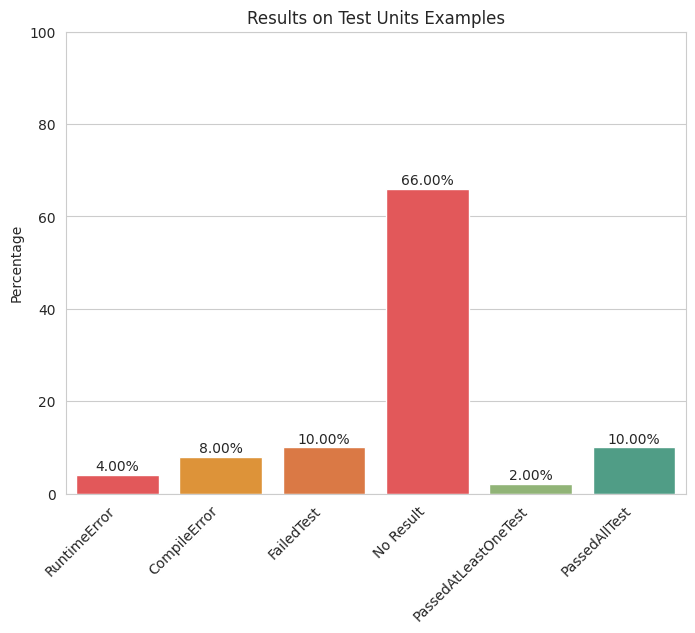

In [72]:
# Calculate the total number of items in the Counter
total = builtins.sum(errors_class.values())


label_order= ['RuntimeError', 'CompileError', 'FailedTest', 'No Result', 'PassedAtLeastOneTest', 'PassedAllTest']

errors_class = {label: errors_class[label]for label in label_order}

# Calculate the percentage of each item in the Counter
percentages = [(count/total)*100 for count in errors_class.values()]

# Define custom colors
colors_dict = {'RuntimeError': '#f94144',
               'FailedTest': '#f3722c',
               'PassedAllTest': '#43aa8b',
               'CompileError': '#f8961e',
               'PassedAtLeastOneTest': '#90be6d',#90be6d
               'No Result': '#f94144'
               }

# Convert the dictionary of colors to a list
colors = [colors_dict[label] for label in errors_class.keys()]

# Create a Seaborn bar plot
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=list(errors_class.keys()), y=percentages, palette=colors, order=label_order)
ax.set_title("Results on Test Units Examples")
# ax.set_xlabel("Error Type")
ax.set_ylabel("Percentage")
ax.set_ylim([0, 100])
plt.xticks(rotation=45, ha='right')

# Add the percentage values on the bars
for i, v in enumerate(percentages):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()